<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Visual overview of SVD and principal components

Week 9 | 1.1

---


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset = fetch_olivetti_faces()
faces = dataset.data


downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /Users/austinwhaley/scikit_learn_data


In [4]:
faces.shape

(400, 4096)

In [6]:
face10 = faces[10]
face10.shape

(4096,)

In [23]:
def plot_image_matrix(face_image):
    fig, ax = plt.subplots(figsize=(5,5))
    max_pixel_value = max(face_image.max(), -face_image.min()) # makes sure that there's enough contrast
    ax.imshow(face_image, cmap=plt.cm.gray,
              interpolation = 'nearest', vmin=-max_pixel_value,
              vmax = max_pixel_value)
    ax.set_xticks(())
    ax.set_yticks(())

In [24]:
def process_image(image):
    image = image - image.min()
    image = (image / image.max()) - 0.5
    image = image.reshape((64, 64))
    return image

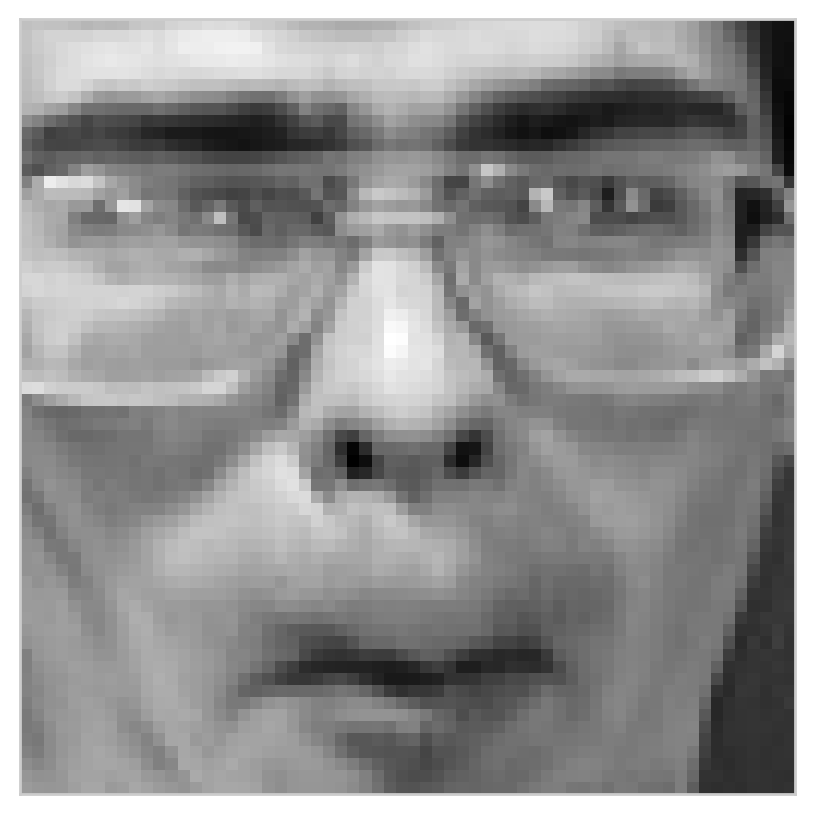

In [25]:
plot_image_matrix(process_image(faces[199]))

---

### "Diagonalization" of a matrix and principal components

If a matrix $X$ is centered, meaning the mean of the columns has been subtracted out, then the covariance matrix of $X$ is:

### $$ Cov = \frac{X^T X}{n-1} $$

Covariance matrices are symmetric, meaning that the matrix is equal to its transpose (upper and lower triangles of the square matrix are mirror images).

Symmetric matrices can be "diagonalized". The process of diagonalization is depicted below [(see wikipedia for more on this)](https://en.wikipedia.org/wiki/Diagonalizable_matrix):

### $$ Q^{-1}AQ=\begin{pmatrix}\lambda_{1} \\
& \lambda_{2} \\
& & \ddots \\
& & & \lambda_{n}\end{pmatrix} $$

or alternatively,

### $$ AQ=Q\begin{pmatrix}\lambda_{1} \\
& \lambda_{2} \\
& & \ddots \\
& & & \lambda_{n}\end{pmatrix} $$

Where $Q$ is a matrix of "eigenvectors" and the matrix of lambda values is the matrix of "eigenvalues". 

If our eigenvalue matrix is denoted $Q$ and the eigenvector matrix is denoted $\Lambda$, we can write the eigendecomposition of the covariance matrix of $X$ as:

### $$ Cov = Q \Lambda Q^T $$

If we "project" our original matrix $X$ using the matrix of eigenvectors, we get a matrix of the principal components. The principal components have the property of being totally uncorrelated with each other (due to the diagonalization of the covariance matrix). We can call the matrix of principal components $P$:

### $$ P = QX $$

---

### Singular value decomposition

The singular value decomposition extends the process of diagonalization to apply to matrices of any shape, not just square matrices. It is the most commonly used technique to perform principal component analysis.

The singular value decomposition of $X$ is written:

### $$ X = USV^T $$

Where $U$ is a matrix of the left singular vectors of $X$, $S$ is the matrix of singular values which is again a diagonal matrix, and $V$ are the right singular values of $X$. 

You can plug this representation of $X$ into the formula for the covariance matrix:

### $$ Cov = \frac{VSU^T USV^T}{n-1} = V \frac{S^2}{n-1}V^T = Q \Lambda Q^T $$

The left singular vectors $U$ are the eigenvectors. We can create the principal components of $X$ with $UX$. The singular values $S$ are direct transformations of the eigenvalues of the covariance matrix we got with the eigendecomposition.

### $$ QX = USV^T V = US $$

In [28]:
face = process_image(faces[199])
U, S, VT = np.linalg.svd(face)

In [29]:
print U.shape, S.shape, VT.shape

(64, 64) (64,) (64, 64)


In [30]:
Sd = np.diag(S)

In [31]:
Sd.shape

(64, 64)

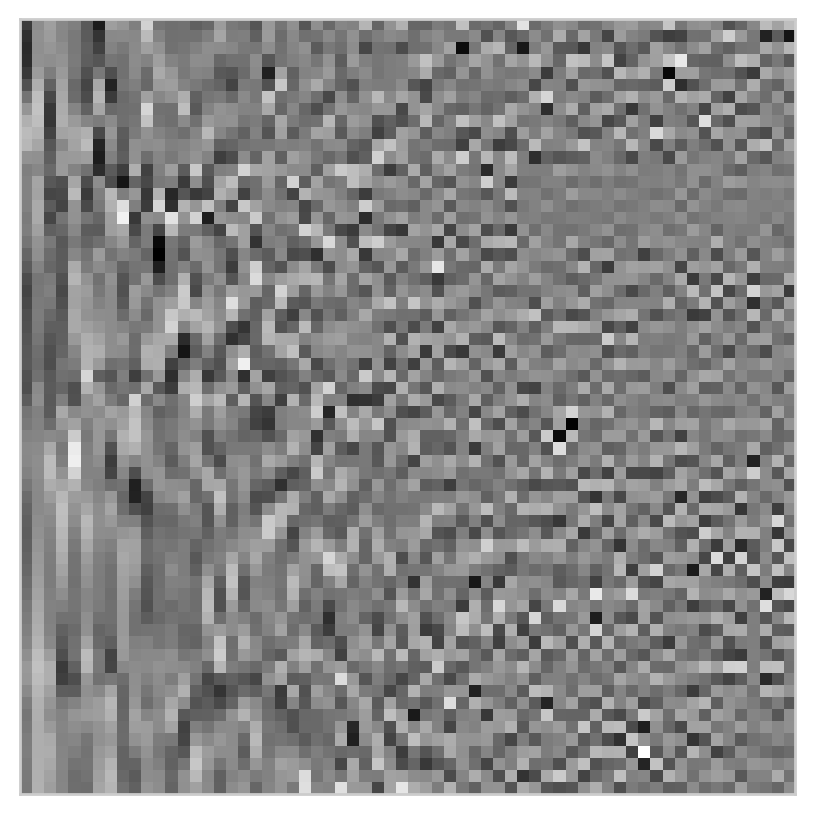

In [33]:
plot_image_matrix(U)